In [1]:
import sys, os
sys.path.append(os.pardir) # 부모 디렉토리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist
import numpy as np
from PIL import Image
import matplotlib.pylab as plt
import pickle

In [2]:
# 처음 한번은 파일 다운 받는데 시간 소요됨
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

In [3]:
# 각 데이터의 형상 출력
print('x_train.shape : ', x_train.shape)
print('t_train.shape : ', t_train.shape)
print('x_test.shape : ', x_test.shape)
print('t_test.shape : ', t_test.shape)


x_train.shape :  (60000, 784)
t_train.shape :  (60000,)
x_test.shape :  (10000, 784)
t_test.shape :  (10000,)


In [4]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

In [5]:
train_first_img = x_train[0]
train_first_label = t_train[0]
print(train_first_label)

5


In [6]:
print(train_first_img.shape)
train_first_img = train_first_img.reshape(28, 28)
print(train_first_img.shape)

(784,)
(28, 28)


In [7]:
#img_show(train_first_img)
# 수행 안됨

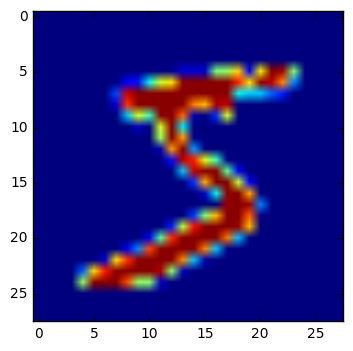

In [8]:
%matplotlib inline
plt.imshow(train_first_img)

In [9]:
def get_test_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

In [10]:
def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

In [11]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [12]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = sigmoid(a3)
    
    return y

In [13]:
x, t = get_test_data()
network = init_network()

In [28]:
print(type(network))

<class 'dict'>


In [41]:
W1, W2, W3 = network['W1'], network['W2'], network['W3']
b1, b2, b3 = network['b1'], network['b2'], network['b3']

In [42]:
print(type(W1))
print(type(b1))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [43]:
print(W1)

[[-0.00741249 -0.00790439 -0.01307499 ...,  0.01978721 -0.04331266
  -0.01350104]
 [-0.01029745 -0.01616653 -0.01228376 ...,  0.01920228  0.02809811
   0.01450908]
 [-0.01309184 -0.00244747 -0.0177224  ...,  0.00944778  0.01387301
   0.03393568]
 ..., 
 [ 0.02242565 -0.0296145  -0.06326169 ..., -0.01012643  0.01120969
   0.01027199]
 [-0.00761533  0.02028973 -0.01498873 ...,  0.02735376 -0.01229855
   0.02407041]
 [ 0.00027915 -0.06848375  0.00911191 ..., -0.03183098  0.00743086
  -0.04021148]]


In [44]:
print(b1)

[-0.06750315  0.0695926  -0.02730473  0.02256093 -0.22001474 -0.22038847
  0.04862635  0.13499236  0.23342554 -0.0487357   0.10170191 -0.03076038
  0.15482435  0.05212503  0.06017235 -0.03364862 -0.11218343 -0.26460695
 -0.03323386  0.13610415  0.06354368  0.04679805 -0.01621654 -0.05775835
 -0.03108677  0.10366164 -0.0845938   0.11665157  0.21852103  0.04437255
  0.03378392 -0.01720384 -0.07383765  0.16152057 -0.10621249 -0.01646949
  0.00913961  0.10238428  0.00916639 -0.0564299  -0.10607515  0.09892716
 -0.07136887 -0.06349134  0.12461706  0.02242282 -0.00047972  0.04527043
 -0.15179175  0.10716812]


In [14]:
accuracy_cnt = 0

In [15]:
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1

In [16]:
print("Accuracy : " + str(float(accuracy_cnt) / len(x)))

Accuracy : 0.9352


In [17]:
x, _ = get_test_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

In [18]:
print('x.shape : ', x.shape)
print('x[0].shape : ', x[0].shape)
print('W1.shape : ', W1.shape)
print('W2.shape : ', W2.shape)
print('W3.shape : ', W3.shape)

x.shape :  (10000, 784)
x[0].shape :  (784,)
W1.shape :  (784, 50)
W2.shape :  (50, 100)
W3.shape :  (100, 10)


In [19]:
x, t = get_test_data()
network = init_network()

In [20]:
batch_size = 100
accuracy_cnt = 0

In [21]:
for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

In [22]:
print("Accuracy : " + str(float(accuracy_cnt) / len(x)))

Accuracy : 0.9352
